In [1]:
path_to_mallet = "/Users/jacobbarrett/mallet-2.0.8/bin/mallet"

In [2]:
import little_mallet_wrapper
import seaborn
import glob
from pathlib import Path

In [3]:
directory = "../Data/Periodical-text-files-single-pages/"

In [4]:
files = glob.glob(f"{directory}/*.txt")

In [5]:
files

['../Data/Periodical-text-files-single-pages/AmSn18940802-V09-31-page-5.txt',
 '../Data/Periodical-text-files-single-pages/AmSn18990824-V14-33-page-15.txt',
 '../Data/Periodical-text-files-single-pages/SOL19001101-V15-43-page-6.txt',
 '../Data/Periodical-text-files-single-pages/LibM19091001-V04-04-page-26.txt',
 '../Data/Periodical-text-files-single-pages/SOL19030205-V18-06-page-2.txt',
 '../Data/Periodical-text-files-single-pages/AmSn18920616-V07-24-page-1.txt',
 '../Data/Periodical-text-files-single-pages/SOL19020601-V17-07-page-41.txt',
 '../Data/Periodical-text-files-single-pages/SOL19021201-V17-13-page-19.txt',
 '../Data/Periodical-text-files-single-pages/AmSn18990406-V14-14-page-7.txt',
 '../Data/Periodical-text-files-single-pages/AmSn18970128-V12-04-page-10.txt',
 '../Data/Periodical-text-files-single-pages/AmSn18990907-V14-35-page-3.txt',
 '../Data/Periodical-text-files-single-pages/AmSn19000215-V15-07-page-12.txt',
 '../Data/Periodical-text-files-single-pages/AmSn18911029-V06-

In [6]:
training_data = []

for file in files:
    with open(file, encoding="utf-8") as f:
        text = f.read()
    processed_text = little_mallet_wrapper.process_string(text, numbers="remove")
    training_data.append(processed_text)

In [7]:
original_texts = []

for file in files:
    with open(file, encoding="utf-8") as f:
        text = f.read()
    original_texts.append(text)

In [8]:
periodical_titles = [Path(file).stem for file in files]

In [9]:
periodical_titles

['AmSn18940802-V09-31-page-5',
 'AmSn18990824-V14-33-page-15',
 'SOL19001101-V15-43-page-6',
 'LibM19091001-V04-04-page-26',
 'SOL19030205-V18-06-page-2',
 'AmSn18920616-V07-24-page-1',
 'SOL19020601-V17-07-page-41',
 'SOL19021201-V17-13-page-19',
 'AmSn18990406-V14-14-page-7',
 'AmSn18970128-V12-04-page-10',
 'AmSn18990907-V14-35-page-3',
 'AmSn19000215-V15-07-page-12',
 'AmSn18911029-V06-42-page-2',
 'AmSn18930511-V08-19-page-6',
 'AmSn18901106-V05-44-page-4',
 'AmSn18980310-V13-10-page-14',
 'LibM19090701-V04-03-page-13',
 'AmSn18970325-V12-12-page-8',
 'AmSn18971216-V12-49-page-5',
 'SOL19030319-V18-12-page-5',
 'LibM19081001-V03-04-page-7',
 'AmSn19000222-V15-08-page-2',
 'SOL19020601-V17-07-page-55',
 'LibM19110101-V06-01-page-40',
 'SOL19020201-V17-03-page-63',
 'SOL19000628-V15-25-page-10',
 'AmSn19000823-V15-33-page-16',
 'LibM19091001-V04-04-page-32',
 'AmSn18950131-V10-05-page-5',
 'AmSn18990427-V14-17-page-5',
 'SOL19021201-V17-13-page-25',
 'LibM19100401-V05-02-page-5',
 '

In [10]:
little_mallet_wrapper.print_dataset_stats(training_data)

Number of Documents: 11472
Mean Number of Words per Document: 483.3
Vocabulary Size: 98077


In [11]:
num_topics = 10
training_data = training_data

In [12]:
output_directory_path = '../Data/Periodical-topic-model-output'

In [13]:
Path(f"{output_directory_path}").mkdir(parents=True, exist_ok=True)

path_to_training_data = f"{output_directory_path}/training.txt"
path_to_formatted_training_data = f"{output_directory_path}/mallet.training"
path_to_model = f"{output_directory_path}/mallet.model.{str(num_topics)}"
path_to_topic_keys = f"{output_directory_path}/mallet.topic_keys.{str(num_topics)}"
path_to_topic_distributions = f"{output_directory_path}/mallet.topic_distributions.{str(num_topics)}"

In [14]:
little_mallet_wrapper.quick_train_topic_model(path_to_mallet, 
                                             output_directory_path,
                                             num_topics,
                                             training_data)

Importing data...
Complete
Training topic model...


Mallet LDA: 10 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 1650
total tokens: 5544003
<10> LL/token: -9.97037
<20> LL/token: -9.3833
<30> LL/token: -9.22277
<40> LL/token: -9.1632

0	0.5	sunday city fair would closing said open business one court ing matter made meeting new chicago public case rev two 
1	0.5	day sunday sabbath law work rest seventh week laws one observance labor days first people lord keep upon would sun 
2	0.5	people government men world liberty american great power one nation war upon may states united peace must life nations man 
3	0.5	church state christian national public religion union schools american would reform catholic religious school political one country churches government nation 
4	0.5	church catholic would rome pope one said roman time could papacy years well many see made history papal even country 
5	0.5	law religious state right civil religion would man rights god government men upon laws one every may conscience liberty christian

[beta: 0.03232] 
<300> LL/token: -9.04065
[beta: 0.03243] 
<310> LL/token: -9.04007
[beta: 0.03253] 
<320> LL/token: -9.03798
[beta: 0.03264] 
<330> LL/token: -9.03692
[beta: 0.03268] 
<340> LL/token: -9.037

0	0.32925	sunday city law closing fair open said business one court would public ing new case made two liquor matter meeting 
1	0.38676	day sunday sabbath law rest laws seventh work week one observance religious first labor would days lord upon people man 
2	0.50138	people one american great war government men states world would united country upon time may liberty nation peace many day 
3	0.51732	church state christian national would religious public union religion american schools reform one people country political upon school united churches 
4	0.28767	church catholic rome roman pope papacy protestant papal catholics one time first history protestants king years england bishop faith new 
5	0.61172	law state right religious government civil religion rights liberty man men god u

[beta: 0.03331] 
<570> LL/token: -9.01984
[beta: 0.03337] 
<580> LL/token: -9.01901
[beta: 0.03333] 
<590> LL/token: -9.01984

0	0.27082	sunday law city court case closing business open fair said one work public made new police ing two county would 
1	0.34095	day sunday sabbath law rest laws seventh religious work week one observance would first labor lord upon days man people 
2	0.45204	people one great would american war men time world country upon day said many states may government united new peace 
3	0.50068	church state christian would national american union public religion religious schools people reform one united states country upon political school 
4	0.19839	church catholic roman rome pope protestant papacy catholics protestants papal bishop first new faith one cardinal england history protestantism holy 
5	0.5423	state law government religious right religion civil rights liberty man upon men one may power god people laws would every 
6	0.32827	god christ man world power me


0	0.25956	sunday law court city day case closing work said one open business fair public county ing would shall made police 
1	0.32828	day sunday sabbath law rest laws seventh religious one week work observance first would days labor man upon people lord 
2	0.44427	people one would great war american men time world country many said upon day new may years man states good 
3	0.51267	church state christian would national american public union religious religion schools one people reform upon united states country political may 
4	0.19325	church catholic roman rome pope protestant papacy catholics protestants papal bishop new faith authority history cardinal protestantism first england holy 
5	0.53201	state law government religious right religion civil rights liberty upon man one may men people would power laws every constitution 
6	0.32281	god christ man power world men lord shall jesus one earth christian would unto said love word spirit upon things 
7	0.12245	bill congress religious l

Complete


([['sunday',
   'law',
   'court',
   'day',
   'city',
   'case',
   'closing',
   'work',
   'said',
   'one',
   'business',
   'open',
   'fair',
   'county',
   'ing',
   'would',
   'upon',
   'made',
   'police',
   'two'],
  ['day',
   'sunday',
   'sabbath',
   'law',
   'rest',
   'seventh',
   'laws',
   'religious',
   'week',
   'work',
   'one',
   'observance',
   'would',
   'first',
   'man',
   'days',
   'labor',
   'people',
   'lord',
   'upon'],
  ['people',
   'one',
   'great',
   'would',
   'war',
   'american',
   'men',
   'time',
   'country',
   'world',
   'said',
   'many',
   'man',
   'may',
   'day',
   'new',
   'upon',
   'peace',
   'years',
   'well'],
  ['church',
   'state',
   'christian',
   'would',
   'national',
   'public',
   'american',
   'union',
   'religious',
   'religion',
   'one',
   'schools',
   'people',
   'reform',
   'upon',
   'states',
   'country',
   'united',
   'political',
   'may'],
  ['church',
   'catholic',
   'r

In [15]:
topics = little_mallet_wrapper.load_topic_keys(path_to_topic_keys)

In [16]:
for topic_number, topic in enumerate(topics):
    print(f"Topic {topic_number}\n\n{topic}\n")

Topic 0

['sunday', 'law', 'court', 'day', 'city', 'case', 'closing', 'work', 'said', 'one', 'business', 'open', 'fair', 'county', 'ing', 'would', 'upon', 'made', 'police', 'two']

Topic 1

['day', 'sunday', 'sabbath', 'law', 'rest', 'seventh', 'laws', 'religious', 'week', 'work', 'one', 'observance', 'would', 'first', 'man', 'days', 'labor', 'people', 'lord', 'upon']

Topic 2

['people', 'one', 'great', 'would', 'war', 'american', 'men', 'time', 'country', 'world', 'said', 'many', 'man', 'may', 'day', 'new', 'upon', 'peace', 'years', 'well']

Topic 3

['church', 'state', 'christian', 'would', 'national', 'public', 'american', 'union', 'religious', 'religion', 'one', 'schools', 'people', 'reform', 'upon', 'states', 'country', 'united', 'political', 'may']

Topic 4

['church', 'catholic', 'roman', 'rome', 'pope', 'protestant', 'papacy', 'catholics', 'protestants', 'papal', 'bishop', 'new', 'cardinal', 'authority', 'history', 'protestantism', 'power', 'first', 'faith', 'england']

Topic 

In [17]:
topic_distributions = little_mallet_wrapper.load_topic_distributions(path_to_topic_distributions)

In [18]:
topic_distributions[32]

[0.0006342503517948571,
 0.0007706339461164064,
 0.14644311188681747,
 0.0012653666236115265,
 0.007862202877844766,
 0.0013156124125720307,
 0.008179965003280497,
 0.0002967700136240543,
 0.0002605195430434126,
 0.832971567341295]

In [19]:
import random
target_labels = random.sample(periodical_titles, 10)

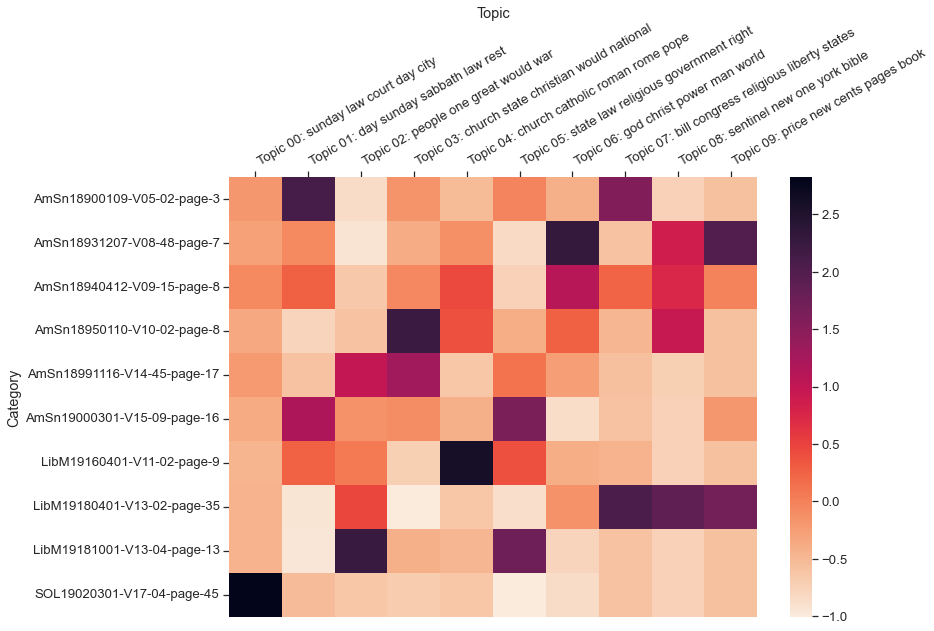

In [20]:
little_mallet_wrapper.plot_categories_by_topics_heatmap(periodical_titles,
                                                       topic_distributions,
                                                       topics,
                                                       output_directory_path + '/categories_by_topics.pdf',
                                                       target_labels=target_labels,
                                                       dim= (13,9)
                                                       )

In [21]:
training_data_periodical_titles = dict(zip(training_data, periodical_titles))
training_data_original_text = dict(zip(training_data, original_texts))

In [32]:
import os
def display_top_titles_per_topic(topic_number=0, number_of_documents=5):
    print(f"Topic {topic_number}\n\n{topics[topic_number]}\n")
    top_documents = []
    for probability,document in little_mallet_wrapper.get_top_docs(training_data, topic_distributions, topic_number, n=number_of_documents):
        print(round(probability, 4), training_data_periodical_titles[document] + "\n")
        top_documents.append(training_data_periodical_titles[document])
    with open(os.path.join(output_directory_path, "top_doc_list.txt"), "w") as o:
        for doc in top_documents:
            o.write(f"{doc}\n")
    return

In [33]:
display_top_titles_per_topic(topic_number=4, number_of_documents=10)

Topic 4

['church', 'catholic', 'roman', 'rome', 'pope', 'protestant', 'papacy', 'catholics', 'protestants', 'papal', 'bishop', 'new', 'cardinal', 'authority', 'history', 'protestantism', 'power', 'first', 'faith', 'england']

0.7961 SOL19030212-V18-07-page-13

0.7502 SOL19021201-V17-13-page-1

0.7388 LibM19080701-V03-03-page-20

0.7133 SOL19001108-V15-44-page-11

0.6883 SOL19030122-V18-04-page-11

0.6738 AmSn19001108-V15-44-page-11

0.6643 LibM19100701-V05-03-page-33

0.6584 SOL19030108-V18-02-page-10

0.6455 SOL19021201-V17-13-page-5

0.641 SOL19030122-V18-04-page-13



In [24]:
from IPython.display import Markdown, display
import re

def display_bolded_topic_words_in_context(topic_number=3, number_of_documents=3, custom_words=None):

    for probability, document in little_mallet_wrapper.get_top_docs(training_data, topic_distributions, topic_number, n=number_of_documents):
        
        print(f"✨Topic {topic_number}✨\n\n{topics[topic_number]}\n")
        
        probability = f"✨✨✨\n\n**{probability}**"
        obit_title = f"**{training_data_periodical_titles[document]}**"
        original_text = training_data_original_text[document]
        topic_words = topics[topic_number]
        topic_words = custom_words if custom_words != None else topic_words

        for word in topic_words:
            if word in original_text:
                original_text = re.sub(f"\\b{word}\\b", f"**{word}**", original_text)

        display(Markdown(probability)), display(Markdown(obit_title)), display(Markdown(original_text))
    return

In [25]:
display_bolded_topic_words_in_context(topic_number=4, number_of_documents=3)

✨Topic 4✨

['church', 'catholic', 'roman', 'rome', 'pope', 'protestant', 'papacy', 'catholics', 'protestants', 'papal', 'bishop', 'new', 'cardinal', 'authority', 'history', 'protestantism', 'power', 'first', 'faith', 'england']



✨✨✨

**0.7960774911857608**

**SOL19030212-V18-07-page-13**

THE SUPREMACY OF THE PAPACY 109 While the council had been disposing of John, ambassadors from Gregory XII. had arrived. They were sent by Gregory " to resign the pontificate in his name, and all right and title to that . dignity." But they came not to the council: Pope Gregory XII. would not recognize the legitimacy of a council convened by Pope John XXIII. Therefore, these messen-gers were commissioned to the emperor, and were empowered to treat with him. They were directed to inform the em-peror that if he and the heads of the na-tions would allow the council to be con-voked anew by Pope Gregory XII., then Pope Gregory XII. would recognize it as lawful council, but not otherwise. To this the emperor and the heads of the na-tions agreed. Accordingly, at the fourteenth session, July 4, 1415, one of Gregory's nuncios took the chair, and from Gregory read two bulls : the one convoking the Council of Constance, and, when thus convoked, owning it as a lawful council: the other empowering this nuncio to act as Pope Gregory's proxy, and, in that character, to submit to the decisions of the council when lawfully convoked as Gregory's council. When the bulls had been thus read, the council was declared convoked in the name of Pope Gregory XII. Then the proxy announced to the council that.  Gregory XII. was ready to sacrifice his dignity to the peace of the Church, and to submit to their disposal of him as they should see. fit. Then the regular president of the coun-cil took the chair, and the emperor his throne. A third bull from Gregory was then read, giving his proxy full **power** to resign the **papal** dignity in his name. Then the renunciation of Gregory was made by the proxy in the following words : I. Charles Malatesta, vicar of Rimini, gov-ernor of Romagna for our most holy father in Christ Lord Pope, Gregory XII., and general  of the holy Roman Church, being authorized by the full **power** that has just now been read, and has been received by me from our said Lord Pope Gregory, compelled by no violence, but only animated with an ardent desire of procuring the peace and union of the Church, do, in the name of the Father, Son, and Holy Ghost, effectually and really renounce for my master Pope Gregory XII. the possession of, and all right and title to, the **papacy**, which he legally enjoys, and do actually resign it in the piesence of our Lord Jesus Christ, and of this general council, which represents the Roman Church and the Church Universal. This act of resignation of Pope Greg-ory XII. was received with thunderous applause by the council. The Te Deum was sung, and mighty commendations were bestowed upon Gregory. Then the council decreed that Benedict XIII. Łshould be required in like manner to re-sign within ten days after he received the notice of the council ; and that if he did not resign within that time, he should be declared " a notorious schismatic, and an obstinate and incorrigible heretic; and as such be deprived of all honor and dig-nity, and cast out of the Church." Ł The council next decreed that Gregory " should retain the dignity of **cardinal**-**bishop** so long as he lived ; that he should be **first** in rank after the **pope**, unless some alteration should be judged expe-dient, with respect to this article, upon the resignation of Peter de Luna ; and that he should be perpetual legate of the Marches of Ancona, and enjoy undis-turbed all the honors, privileges, and emoluments annexed to that dignity. The council granted him besides a full and unlimited absolution from all the ir-regularities he might have been guilty of during his pontificate, exempted him from giving an account of his past con-duct, or any part of it, to any person whatever, and forbade any to be raised to the pontificate till they had promised upon oath to observe this decree, not-withstanding all the canons, constitu- 

✨Topic 4✨

['church', 'catholic', 'roman', 'rome', 'pope', 'protestant', 'papacy', 'catholics', 'protestants', 'papal', 'bishop', 'new', 'cardinal', 'authority', 'history', 'protestantism', 'power', 'first', 'faith', 'england']



✨✨✨

**0.7502272137705578**

**SOL19021201-V17-13-page-1**

Me /get .00aell ONEllf7r11/3E L1133E2777 VOL. I7 NEW YORK, DECEMBER, 1902 No. I 3 The Supremacy of the Papacy By Alonzo T. zones Iv THE PAPACY-THE VERY SAME PAPACY THAT THE WORLD KNEW IN THE TENTH CENTURY-IS TO-DAY AIMING TO SECURE TO HERSELF A RECOGNIZED SUPREMACY IN WORLD AFFAIRS. SHE HAD THIS ONCE. THE ARTICLES THAT ARE APPEARING UNDER THE ABOVE HEADING ARE A STUDY OF HOW SHE USED IT. SINCE IT IS HER OWN BOAST THAT "ROME NEVER CHANGES," TO KNOW WHAT SHE DID WITH SUCH SUPREMACY WHEN SHE HAD IT IS TO KNOW WHAT SHE WILL DO WITH IT WHEN SHE SECURES IT AGAIN. AFTER the death of Innocent VI. (Sept. 12, 1357 ) , when the car-dinals met in conclave to elect a succes-sor, a whole month was spent without their coming to agreement. Believing that they could not agree upon any one of their number, it was proposed that they choose for **pope** some one who was not of the college of cardinals. This was agreed to; and William Grimoardi, abbot of St. Victor at Marseilles, was chosen, who took the name of Pope Urban V. (Oct. 28, 1362, to Dec. 19, 1370). He had been sent as legate to the kingdom of Naples, by Innocent VI., and so was absent from Avignon when chosen. When he heard of the death of Innocent, he had remarked : "Could I but see a **pope** who would return to his own Church at Rome, and quash the petty ty-rants of Italy, I should die with great satisfaction the next day." And now, finding himself to be **pope**, he carried out this, his wish, and removed from Avignon to Rome in 1367, arriving in that city October 16. "He was greeted by the clergy and the people with a tu-mult of joy. He celebrated mass at the altar of St. Peter : the **first** **pope** since the days of Boniface VIII." In August, 1368, the emperor Charles IV. came to Rome, and was crowned by the **pope**. The emperor led the **pope**'s horse from the castle of St. Angelo to St. Peter's Church, and performed the office of dea-con to the **pope**, in the service at St. Peter's. But Urban did not remain long in Rome; for, September, 137o, he went to Avignon. He arrived at Avignon Sep-tember 24; he was taken sick on that very day, and died December 19. Through a regular election by the car-dinals, Urban V. was succeeded by Peter Roger, a nephew of Clement VI., who 

✨Topic 4✨

['church', 'catholic', 'roman', 'rome', 'pope', 'protestant', 'papacy', 'catholics', 'protestants', 'papal', 'bishop', 'new', 'cardinal', 'authority', 'history', 'protestantism', 'power', 'first', 'faith', 'england']



✨✨✨

**0.7387502727292454**

**LibM19080701-V03-03-page-20**

From stereograph, copyright by Underwood and Underwood, New York City THE PAPAL CHAIR-BEARERS AND THE GORGEOUS CHAIR OF STATE IN WHICH THEY CARRY THE POPE TO ST. 18  LIBERTY emperor could dictate the polity and even the creed of the **church**, to the con-dition where the **church** was the sole **authority** in all things that concerned her and in many things that did not concern her. The Roman Bishop Exalted Melchiades, who held the position of **bishop** of Rome from 311 to 314, was constituted by imperial au-thority the head of the synod of bishops who sat to judge the dis-putes of the Donatists. In 325 the **bishop** of Rome was recognized a s the **first** **bishop** of the empire. In 347 the **bishop** of Rome w a s made the source of appeal in disputed mat-ters. T h e em-peror Valentin-ian (364-375 A. D.) made the **bishop** of Rome the judge of other bishops. In 385 the **bishop** issued a decretal which was to be strictly observed under penalty of ex-communication. He also declared that " no one should presume to ordain a **bishop** without the knowledge of the apostolic sea." During the episcopate of Innocent I (402-417) an order was promulgated to the effect that " all ecclesiastical matters throughout the world are, by divine right, to be re-ferred to the apostolic see, before they  are finally decided in the provinces." Zosimus (417-418) went a little further than Innocent, and declared that the Roman **bishop** not only had the right to PETER'S ON CEREMONIAL OCCASIONS judge all causes, but that his judgment was irrevocable. But it was during the episcopate of Leo I, or " Leo the Great," that the most important and decisive step was taken in exalting the **bishop** of Rome to the headship of the churches, and carrying out the purpose of that apostate **church** to dominate the whole world. In 445 A. D. the Emperor Valentinian III, at the instigation of Leo himself, issued 